# Random ICCMA example

ABAF(Assumptions=[a0,a1,a2,a3,a4,a5,a6,a7], Rules=[r1[0.5]: s8 :- a0, a1, a6.,r2[0.5]: s8 :- a1.,r3[0.5]: s8 :- a1, a5, a3.,r4[0.5]: s8 :- a5, a3.,r5[0.5]: s7 :- a0.,r6[0.5]: s12 :- a5, a3, a6.,r7[0.5]: s12 :- a4, a7, a2, a1, a6.,r8[0.5]: s12 :- a2, a0, a1, a6, s7.,r9[0.5]: s3 :- a4.,r10[0.5]: s3 :- a1.,r11[0.5]: s3 :- a0, a1, a2.,r12[0.5]: s5 :- a3.,r13[0.5]: s5 :- a7, a3, a0, a1, s7.,r14[0.5]: s16 :- a0, a5, a3, s7.,r15[0.5]: s16 :- a2, a7, a5, s7.,r16[0.5]: s16 :- s12, s5.,r17[0.5]: s14 :- a7.,r18[0.5]: s6 :- s16, a5.,r19[0.5]: s6 :- s16, a7, a0, s8, a5.,r20[0.5]: s11 :- a7, s6, a6, s7.,r21[0.5]: s11 :- a5.,r22[0.5]: s11 :- s3, s16.,r23[0.5]: s2 :- a1, s8.,r24[0.5]: s2 :- a4, s12.,r25[0.5]: s2 :- a0, a1, s12, a7.,r26[0.5]: s2 :- s14, a3, a0, s5, a5.,r27[0.5]: s10 :- a0, a4, s12, a3.,r28[0.5]: s10 :- a0, s6.,r29[0.5]: s10 :- s12, a5.,r30[0.5]: s10 :- a4, s16, s14, a7, a3.,r31[0.5]: s10 :- a7.,r32[0.5]: s4 :- s6.,r33[0.5]: s4 :- s16.,r34[0.5]: s0 :- a0, a6.,r35[0.5]: s0 :- s12.,r36[0.

Analysing rules: 100%|██████████| 50/50 [00:00<00:00, 1158.28it/s]


0.29s to build 547 arguments

Support: {a0} -> a0 
Support: {a0,a1,a3,a5,a7} -> a1 
Support: {a0,a1,a3,a5,a6,a7} -> a1 
Support: {a2,a3,a4,a6,a7} -> a1 
Support: {a3,a5,a6,a7} -> a1 
Support: {a0,a2,a3,a6} -> a1 
Support: {a0,a2,a3,a5,a6} -> a1 
Support: {a0,a2,a3,a4,a5,a6,a7} -> a1 
Support: {a0,a3,a5} -> a1 
Support: {a0,a1,a2,a3,a6,a7} -> a1 
Support: {a2,a3,a5,a6,a7} -> a1 
Support: {a0,a1,a2,a5,a7} -> a1 
Support: {a0,a3,a5,a6} -> a1 
Support: {a0,a3,a5,a6,a7} -> a1 
Support: {a1,a3,a5,a6,a7} -> a1 
Support: {a0,a2,a3,a5,a7} -> a1 
Support: {a3,a4,a5,a6,a7} -> a1 
Support: {a0,a3,a4,a5,a6,a7} -> a1 
Support: {a0,a1,a3,a4,a5,a6,a7} -> a1 
Support: {a0,a1,a2,a3,a5,a7} -> a1 
Support: {a0,a2,a5,a7} -> a1 
Support: {a0,a1,a2,a3,a4,a5,a6,a7} -> a1 
Support: {a3,a5,a6} -> a1 
Support: {a0,a3,a5,a7} -> a1 
Support: {a1} -> a1 
Support: {a1,a2,a3,a4,a5,a6,a7} -> a1 
Support: {a0,a2,a3,a4,a6,a7} -> a1 
Support: {a0,a2,a3,a5,a6,a7} -> a1 
Support: {a0,a1,a2,a3,a4,a6,a7} -> a1 
Support: {a0,

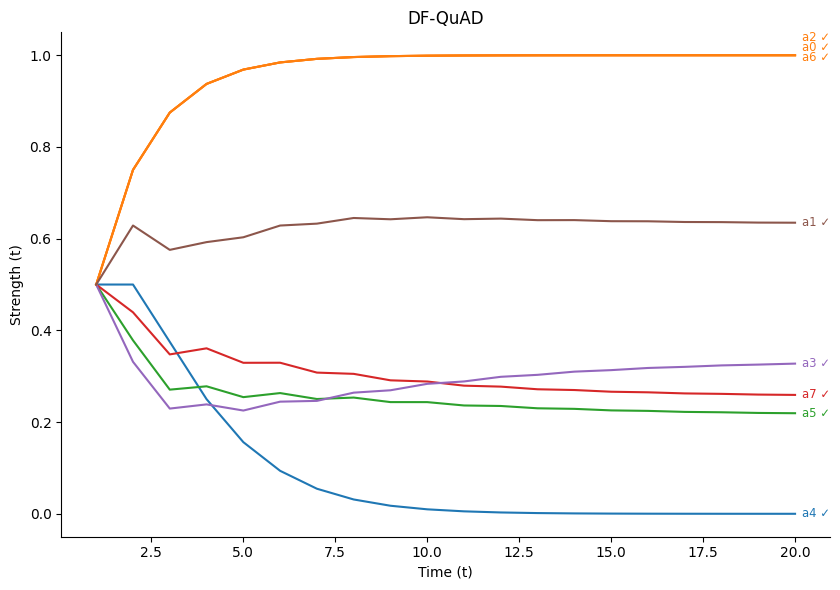

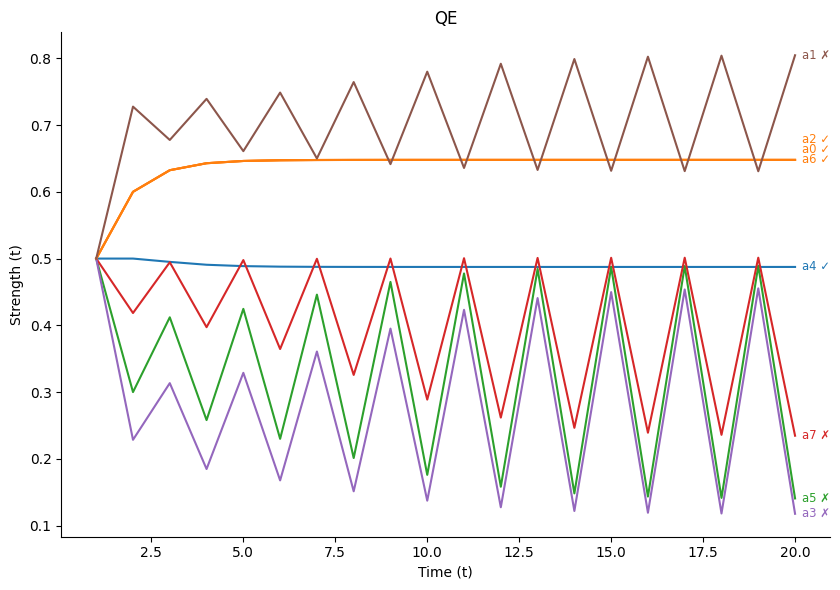

In [1]:
import sys
sys.path.append("../")

from BAG import BAG

from plotting import strengthplot

from ABAF import ABAF
from ABAF.Assumption import Assumption
from BSAF import BSAF
from BSAF.Argument import Argument
from semantics.bsafDiscreteModular import DiscreteModular
from semantics.modular.EulerBasedInfluence import EulerBasedInfluence
from semantics.modular.LinearInfluence import LinearInfluence
from semantics.modular.ProductAggregation import ProductAggregation
from semantics.modular.SetProductAggregation import SetProductAggregation
from semantics.modular.SetSumAggregation import SetSumAggregation
from semantics.modular import SumAggregation
from semantics.modular import QuadraticMaximumInfluence

## Load ICCMA example
abaf = ABAF(path=rf"./iccma_style_abafs/non_flat_1_s25_c0.02_n0.2_a0.3_r5_b5_1.aba")

DELTA = 5
EPSILON = 1e-2

print(abaf)

print(f"Number of Assumptions: {len(abaf.assumptions)}")
print(f"Number of Rules: {len(abaf.rules)}")

bsaf = abaf.to_bsaf()

print(bsaf)

model = DiscreteModular(BSAF=bsaf, aggregation=ProductAggregation(), 
                        influence=LinearInfluence(conservativeness=1), 
                        set_aggregation=SetProductAggregation())

model.solve(20, generate_plot=True, verbose=True)

strengthplot(model, delta=DELTA, epsilon=EPSILON,
             title="DF-QuAD", wide=10, tall=6)

# check convergence over the last 5 iterations, with ε=1e-3
per_arg = model.has_converged(epsilon=1e-2, last_n=DELTA)
print(per_arg)  
# e.g. {'a0': True, 'a1': False, ...}

if model.is_globally_converged(epsilon=EPSILON, last_n=DELTA):
    print("All assumptions have stabilized in the last 5 steps.")
else:
    print("Some are still oscillating or drifting.")


model2 = DiscreteModular(BSAF=bsaf, aggregation=SumAggregation(), 
                        influence=QuadraticMaximumInfluence(conservativeness=1), 
                        set_aggregation=SetProductAggregation())

model2.solve(20, generate_plot=True, verbose=True)

strengthplot(model2, delta=DELTA, epsilon=EPSILON,
             title="QE", wide=10, tall=6)

# check convergence over the last 5 iterations, with ε=1e-3
per_arg = model2.has_converged(epsilon=EPSILON, last_n=DELTA)
print(per_arg)  
# e.g. {'a0': True, 'a1': False, ...}

if model2.is_globally_converged(epsilon=EPSILON, last_n=DELTA):
    print("All assumptions have stabilized in the last 5 steps.")
else:
    print("Some are still oscillating or drifting.")
